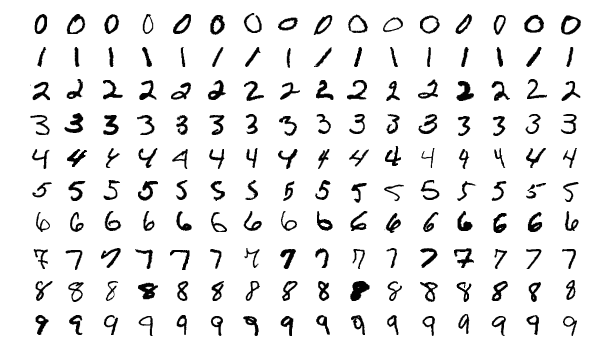

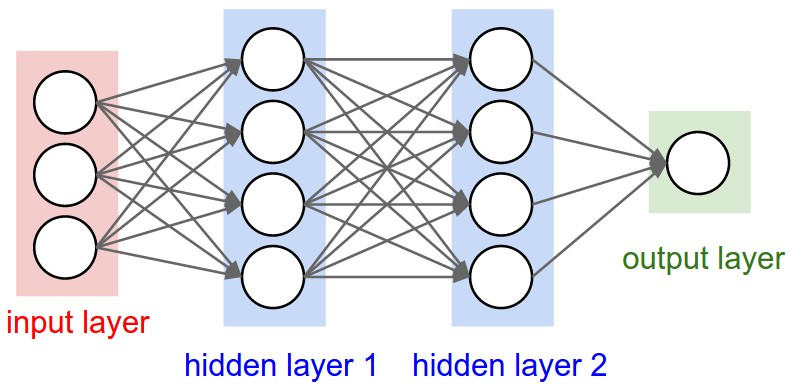

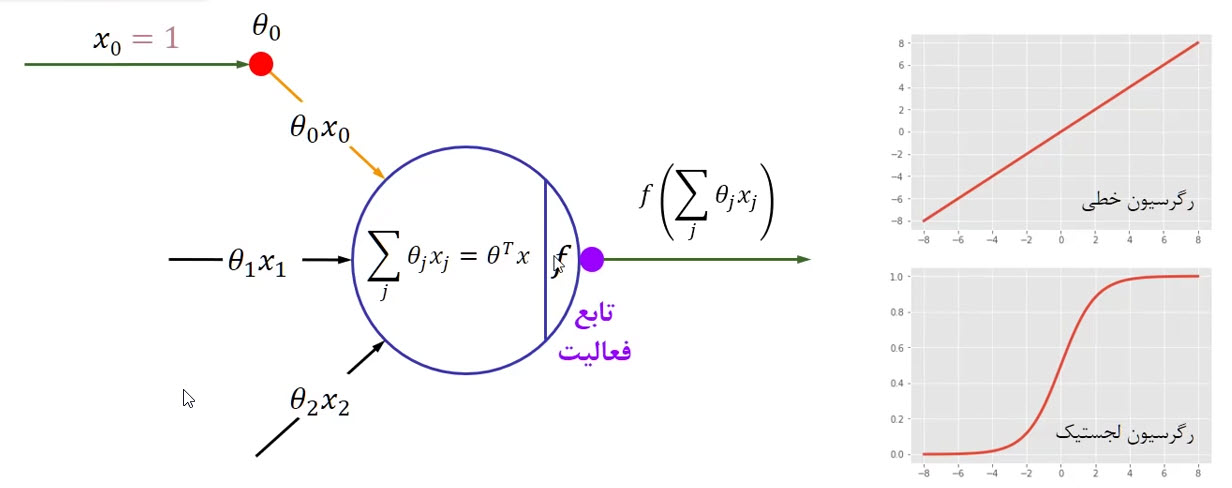

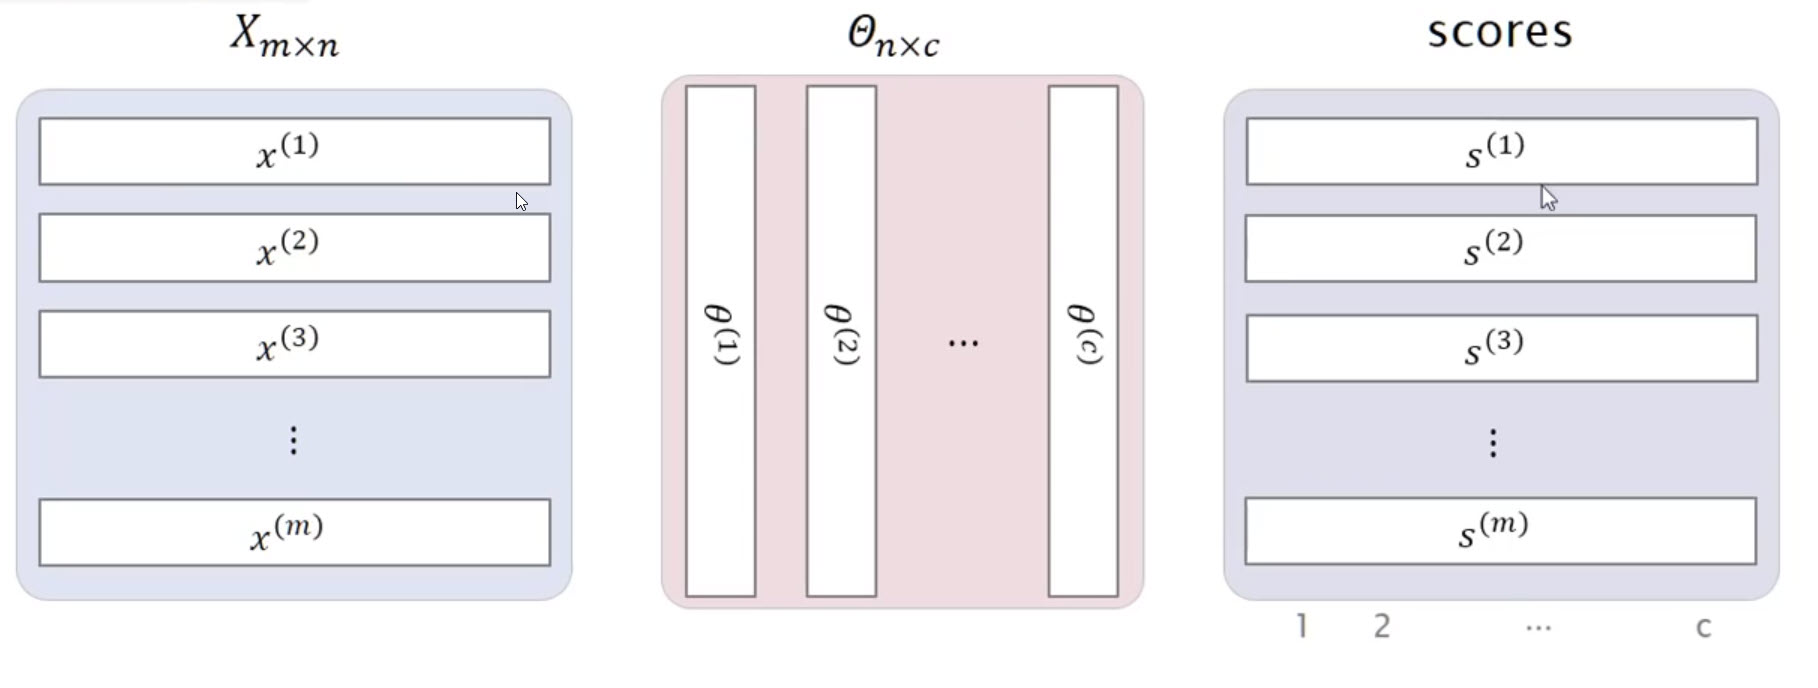

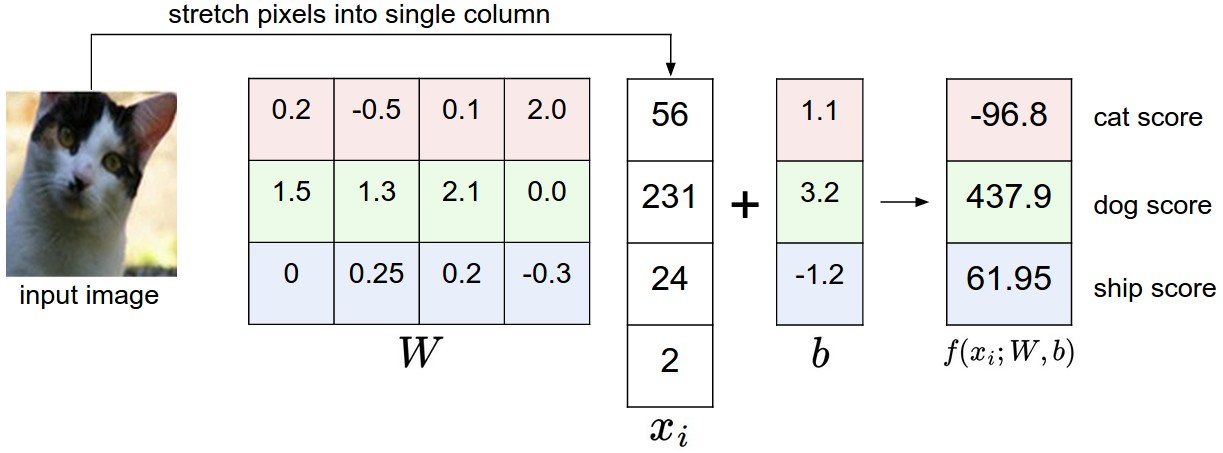

# Data  
# model 
# loss Function
# optimizer 

In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
import torchvision.datasets as dataset

In [5]:
import torchvision.transforms as transforms

In [6]:
import matplotlib.pyplot as plt

In [7]:
import torch.nn.functional as F

In [13]:
from torch.utils.data import DataLoader

# Data

In [9]:
train_ds=dataset.MNIST(root='/root',train=True,transform=transforms.ToTensor(),download=True)
test_ds=dataset.MNIST(root='/root',train=False,transform=transforms.ToTensor(),download=True)

In [10]:
train_ds.data.shape

torch.Size([60000, 28, 28])

In [11]:
test_ds.data.shape

torch.Size([10000, 28, 28])

In [15]:
batch_size=32

In [16]:
train_dl=DataLoader(dataset=train_ds,batch_size=batch_size,shuffle=True,num_workers=2)
test_dl=DataLoader(dataset=test_ds,batch_size=batch_size,shuffle=True,num_workers=2)

In [17]:
image,target=next(iter(train_dl))

In [18]:
image.shape

torch.Size([32, 1, 28, 28])

In [21]:
target

tensor([4, 9, 0, 8, 1, 5, 6, 3, 7, 2, 4, 9, 7, 2, 8, 1, 7, 9, 3, 3, 2, 8, 9, 7,
        1, 9, 7, 6, 2, 3, 2, 8])

In [25]:
image[0,0].shape

torch.Size([28, 28])

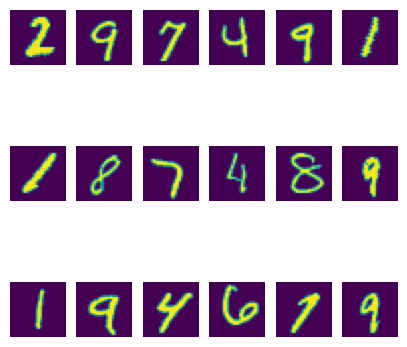

In [27]:
image,target=next(iter(train_dl))
plt.figure(figsize=(5,5))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(image[i,0])
    plt.axis('off')
plt.show()    

# Model

In [29]:
class SimpleNN(nn.Module):
    def __init__(self,num_feature,num_class):
        super(SimpleNN,self).__init__()
        self.fc1=nn.Linear(in_features=num_feature,out_features=100)
        self.fc2=nn.Linear(in_features=100,out_features=num_class)
    
    def forward(self,x):
        out=self.fc1(x)
        out=F.relu(out)
        out=self.fc2(out)
        return out
       

In [30]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [31]:
model=SimpleNN(28*28,10).to(device)

In [32]:
model

SimpleNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

# loss Function

In [33]:
citertion=nn.CrossEntropyLoss()


# optimizer

In [34]:
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [35]:
epoch=10
for i in range(epoch):
    SumLoss=0
    for idx,(data,target) in enumerate(train_dl):
        data=data.to(device)
        target=target.to(device)
        data=data.reshape(data.shape[0],-1)
        
        optimizer.zero_grad()
        
        score=model(data)
        
        loss=citertion(score,target)
        
        SumLoss+=loss
        
        loss.backward()
        
        optimizer.step()
        
        
        
    print(f"loss in epoch number {i+1} is equal to {SumLoss} ")    
        
 

loss in epoch number 1 is equal to450.66986083984375 
loss in epoch number 2 is equal to306.3306579589844 
loss in epoch number 3 is equal to264.87255859375 
loss in epoch number 4 is equal to251.6470489501953 
loss in epoch number 5 is equal to234.01864624023438 
loss in epoch number 6 is equal to218.46957397460938 
loss in epoch number 7 is equal to218.11294555664062 
loss in epoch number 8 is equal to201.372314453125 
loss in epoch number 9 is equal to184.77908325195312 
loss in epoch number 10 is equal to186.67489624023438 


In [37]:
def checkAccuracy(dataLoader,model):
    
    if dataLoader.dataset.train :
        print('Accuracy on train data')
    else :
        print('accuracy on test data')
        
    num_correct=0
    num_sample=0
    
    model.eval()
    
    with torch.no_grad():
        for x,y in dataLoader:
            x=x.to(device)
            y=y.to(device)
            
            x=x.reshape(x.shape[0],-1)
            
            score=model(x)
            
            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_sample+=len(y)
            
        print(f"accuracy is equal to {num_correct/num_sample}")
        
    model.train()        
      

In [38]:
checkAccuracy(train_dl,model)

Accuracy on train data
accuracy is equal to 0.9794333577156067


In [39]:
checkAccuracy(test_dl,model)

accuracy on test data
accuracy is equal to 0.9637999534606934
